In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os


zip_file_path = '/content/drive/My Drive/majproj.zip'


extraction_path = '/content/'


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'cv2'

In [5]:
image_data= 'final_data'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,battery
1,glass
2,clothes
3,paper
4,plastic
5,biological
6,metal
7,carboard
8,shoes


In [6]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,final_data/glass/brown-glass8.jpg,glass
1,final_data/metal/metal68.jpg,metal
2,final_data/biological/biological285.jpg,biological
3,final_data/battery/battery222.jpg,battery
4,final_data/clothes/clothes303.jpg,clothes
...,...,...
8366,final_data/biological/biological575.jpg,biological
8367,final_data/clothes/clothes682.jpg,clothes
8368,final_data/battery/battery337.jpg,battery
8369,final_data/carboard/POSAD_1_10-Sep_20-14-33_01...,carboard


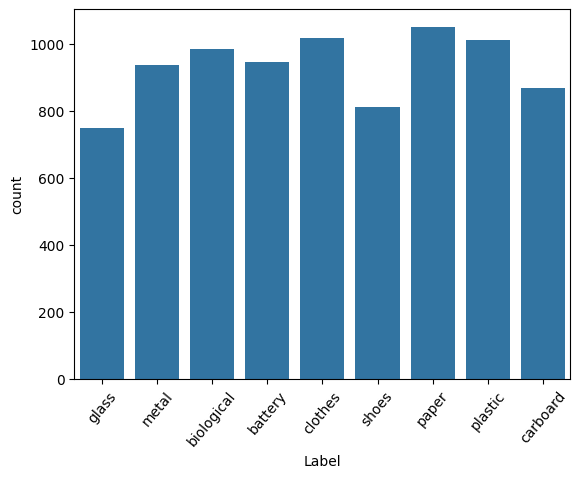

In [7]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

In [8]:
train_data_dir =image_data
batch_size = 128
target_size = (224,224)
validation_split = 0.2

In [9]:
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=50,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)

Found 8371 files belonging to 9 classes.
Using 6697 files for training.
Found 8371 files belonging to 9 classes.
Using 1674 files for validation.


In [10]:
class_names = train.class_names
class_names

['battery',
 'biological',
 'carboard',
 'clothes',
 'glass',
 'metal',
 'paper',
 'plastic',
 'shoes']

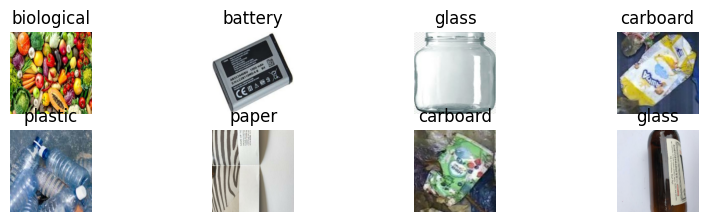

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
base_model = tf.keras.applications.EfficientNetV2B1(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(12,activation=tf.nn.softmax))     #12 classes
keras_model.summary()

28456008/28456008 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b1 (Functio  (None, 7, 7, 1280)        6931124   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 12)                752652    
                                                                 
Total params: 7683776 (29.31 MB)
Trainable params: 752652 (2.87 MB)
Non-trainable params: 6931124 (26.44 MB)
_________________________________________________________________


In [13]:
!pip install pydot

In [25]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [26]:
early_stopping =EarlyStopping(patience=10, restore_best_weights=True)

In [27]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
hist=keras_model.fit_generator(train,epochs=15,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/15
53/53 [==============================] - 30s 371ms/step - loss: 0.1586 - accuracy: 0.9704 - val_loss: 0.0762 - val_accuracy: 0.9815
Epoch 2/15
53/53 [==============================] - 20s 351ms/step - loss: 0.1085 - accuracy: 0.9813 - val_loss: 0.1065 - val_accuracy: 0.9827
Epoch 3/15
53/53 [==============================] - 19s 335ms/step - loss: 0.1065 - accuracy: 0.9810 - val_loss: 0.1081 - val_accuracy: 0.9839
Epoch 4/15
53/53 [==============================] - 18s 319ms/step - loss: 0.1296 - accuracy: 0.9800 - val_loss: 0.1233 - val_accuracy: 0.9845
Epoch 5/15
53/53 [==============================] - 19s 331ms/step - loss: 0.0885 - accuracy: 0.9858 - val_loss: 0.1236 - val_accuracy: 0.9839
Epoch 6/15
53/53 [==============================] - 20s 357ms/step - loss: 0.0796 - accuracy: 0.9878 - val_loss: 0.0748 - val_accuracy: 0.9892
Epoch 7/15
53/53 [==============================] - 18s 330ms/step - loss: 0.1029 - accuracy: 0.9828 - val_loss: 0.1253 - val_accuracy: 0.9839

In [30]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

14/14 [==============================] - 4s 213ms/step - loss: 0.1367 - accuracy: 0.9869
Test Loss = 0.13667894899845123
Test Accuracy = 0.9868578314781189


In [31]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.158613,0.970435,0.076210,0.981481
1,0.108513,0.981335,0.106538,0.982676
2,0.106540,0.981036,0.108053,0.983871
3,0.129605,0.979991,0.123292,0.984468
4,0.088477,0.985815,0.123616,0.983871
5,0.079551,0.987756,0.074809,0.989247
6,0.102925,0.982828,0.125329,0.983871
7,0.086948,0.985516,0.126671,0.986260
8,0.071838,0.988950,0.106389,0.987455
9,0.095934,0.985815,0.116428,0.988650


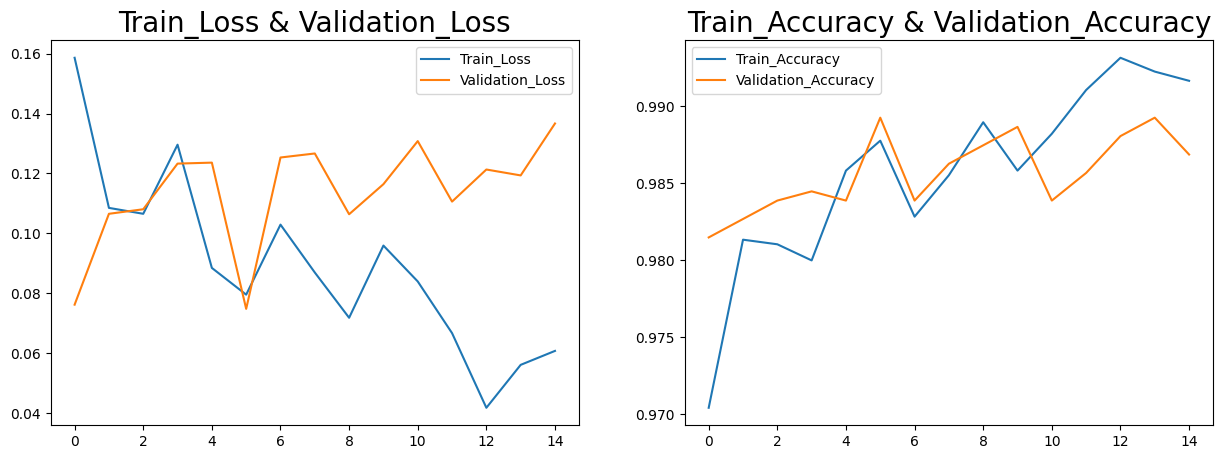

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [33]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

53/53 [==============================] - 5s 59ms/step


,Actual,Prediction
0,0,0
1,3,3
2,2,2
3,5,5
4,8,8
...,...,...
1669,0,0
1670,4,4
1671,4,4
1672,5,5


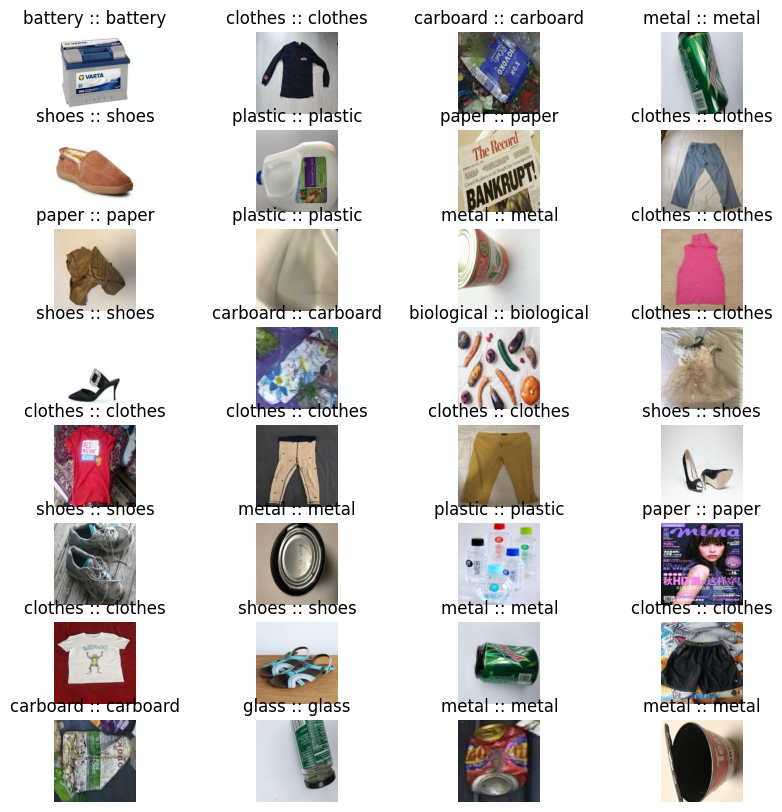

In [34]:
plt.figure(figsize=(10,10))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

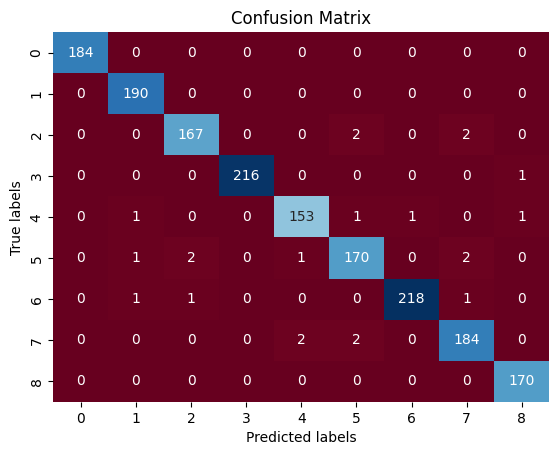

array([[184,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 190,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 167,   0,   0,   2,   0,   2,   0],
       [  0,   0,   0, 216,   0,   0,   0,   0,   1],
       [  0,   1,   0,   0, 153,   1,   1,   0,   1],
       [  0,   1,   2,   0,   1, 170,   0,   2,   0],
       [  0,   1,   1,   0,   0,   0, 218,   1,   0],
       [  0,   0,   0,   0,   2,   2,   0, 184,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 170]])

In [35]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()
CM

In [36]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.4f}%".format(Acc * 100))

accuracy is: 98.6858%


In [1]:
import tensorflow as tf

model = tf.keras.models.load_model('my_keras_model.h5')

TypeError: <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'stem_bn', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.9, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 32]}, 'name': 'stem_bn', 'inbound_nodes': [[['stem_conv', 0, 0, {}]]]}.

Exception encountered: Error when deserializing class 'BatchNormalization' using config={'name': 'stem_bn', 'trainable': False, 'dtype': 'float32', 'axis': [3], 'momentum': 0.9, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}.

Exception encountered: int() argument must be a string, a bytes-like object or a real number, not 'list'

1/1 [==============================] - 0s 54ms/step


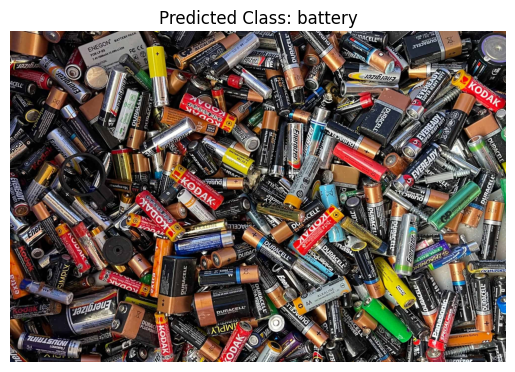

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(224, 224)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    return img_array

# Define a function to make predictions on a single image
def predict_single_image(image_path, model):
    preprocessed_img = preprocess_image(image_path)
    prediction = model.predict(preprocessed_img)
    predicted_class = np.argmax(prediction[0])  # Get the index of the class with the highest probability
    return predicted_class

# Path to the image you want to test
image_path = "battery.jpg"

# Make a prediction on the single image
predicted_class_index = predict_single_image(image_path, model)

# Map predicted class index to class name
class_names = ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes']
predicted_class_name = class_names[predicted_class_index]

# Display the image and predicted class
img = plt.imread(image_path)
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()
